<a href="https://colab.research.google.com/github/OthmanHaikal/FraudDetect1/blob/master/FraudDetect1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
# Replace 'your_filename.csv' with the actual name of your uploaded file
df = pd.read_csv(next(iter(uploaded)))

# Display basic information about the dataset
print("Dataset Information:\n")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:\n")
print(df.head())


Saving creditcard.csv to creditcard.csv
Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null 

In [ ]:
# Count the number of samples in each class
class_counts = df['Class'].value_counts()
print("\nClass Distribution:\n", class_counts)

# Calculate and print the percentage of fraud cases
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"\nPercentage of Fraud Cases: {fraud_percentage:.2f}%")



Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraud Cases: 0.17%


In [ ]:
# Display summary statistics for the dataset
print("\nSummary Statistics:\n")
print(df.describe())



Summary Statistics:

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

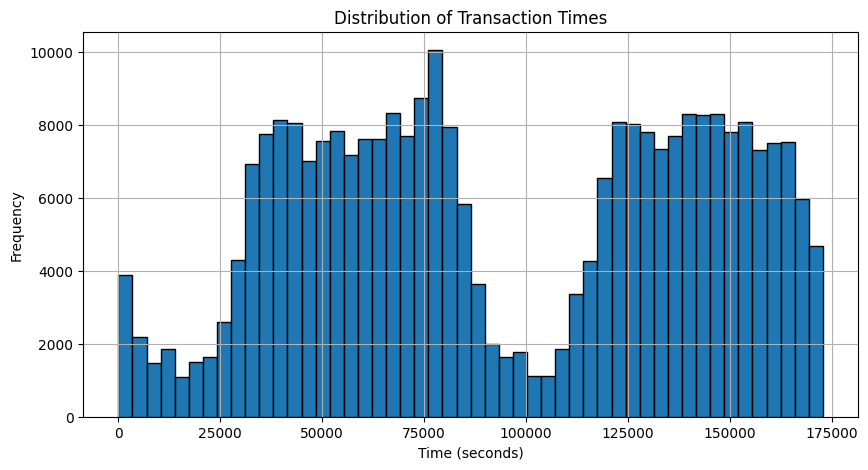

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of transaction times
plt.figure(figsize=(10, 5))
df['Time'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Transaction Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


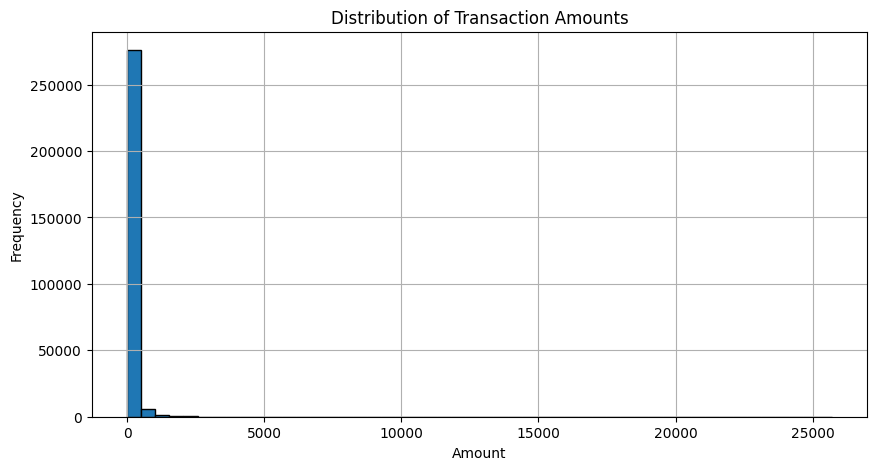

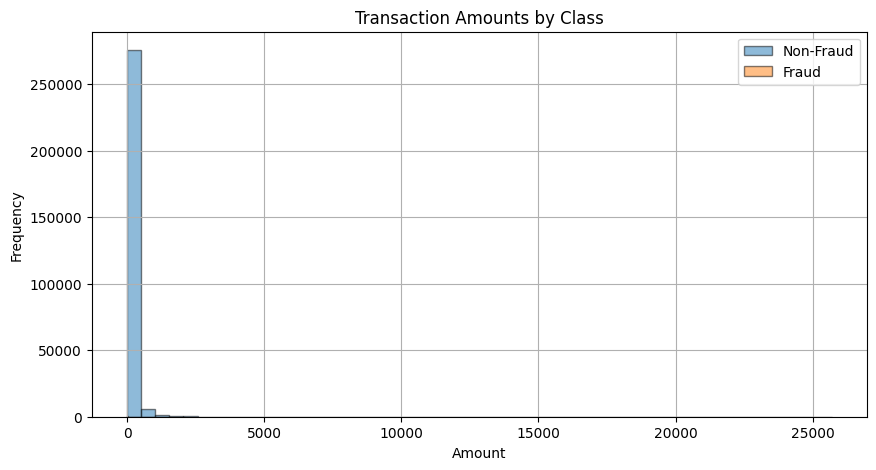

In [ ]:
# Plot transaction amount for all transactions
plt.figure(figsize=(10, 5))
df['Amount'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Separate plots for fraud and non-fraud transactions
plt.figure(figsize=(10, 5))
df[df['Class'] == 0]['Amount'].hist(bins=50, alpha=0.5, label='Non-Fraud', edgecolor='black')
df[df['Class'] == 1]['Amount'].hist(bins=50, alpha=0.5, label='Fraud', edgecolor='black')
plt.title('Transaction Amounts by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Correlation with Fraud (Class):
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


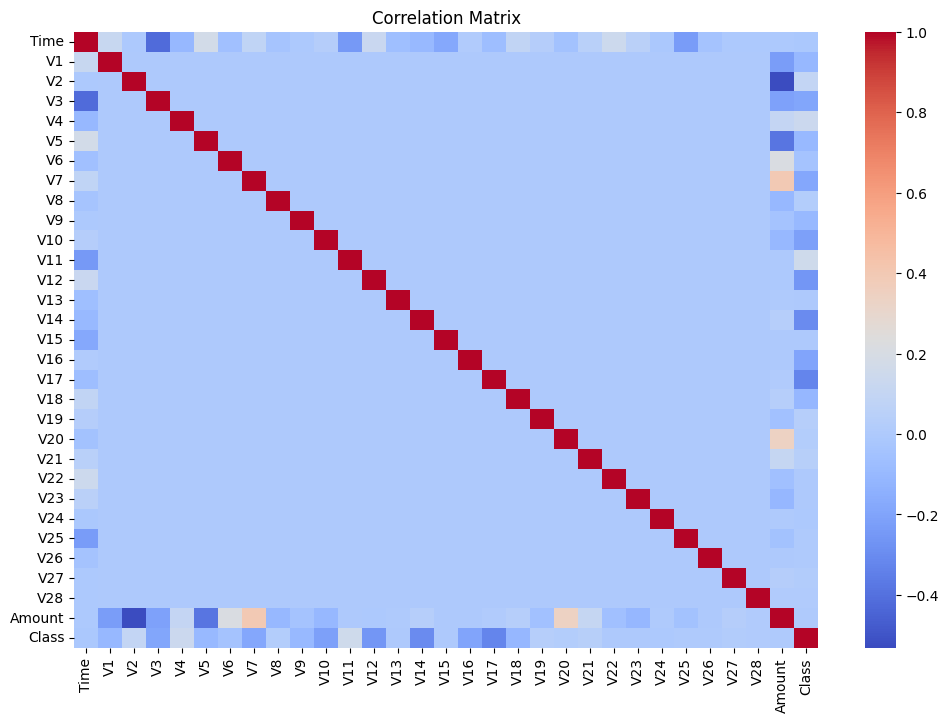

In [ ]:
# Compute correlation matrix and display correlation with 'Class'
corr_matrix = df.corr()
fraud_correlation = corr_matrix['Class'].sort_values(ascending=False)
print("Correlation with Fraud (Class):\n", fraud_correlation)

# Plot a heatmap of the correlation matrix (if needed for insights)
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


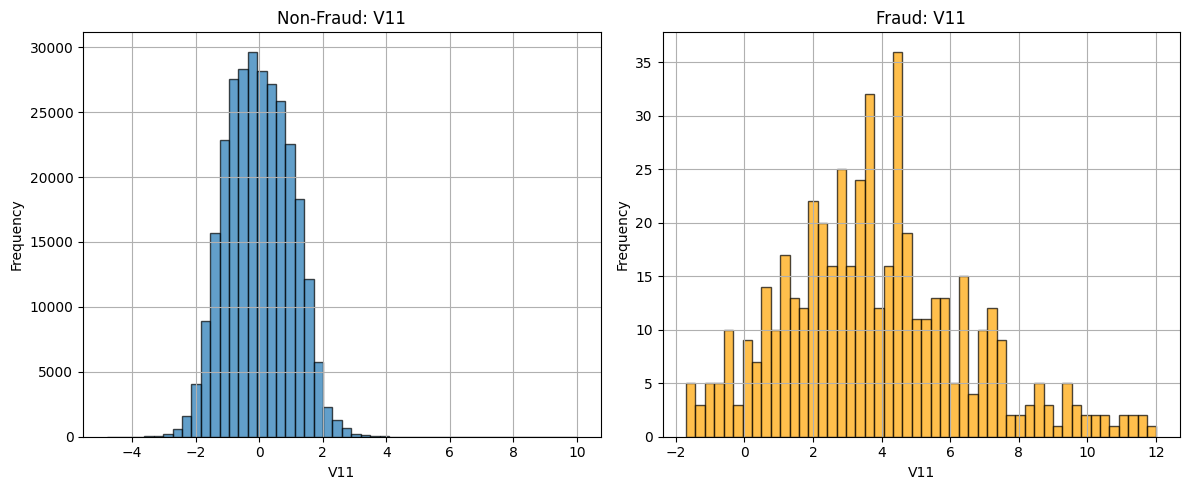

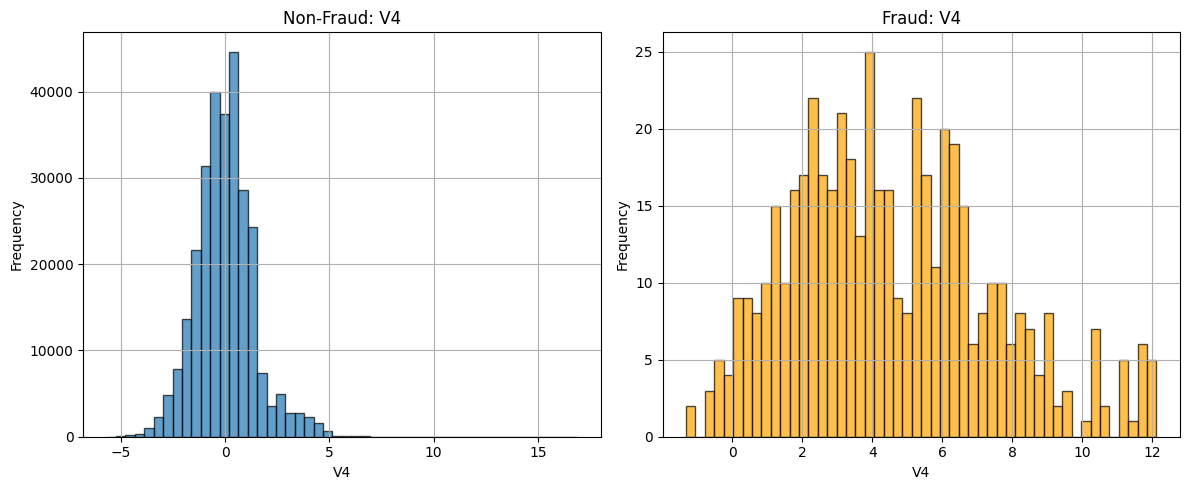

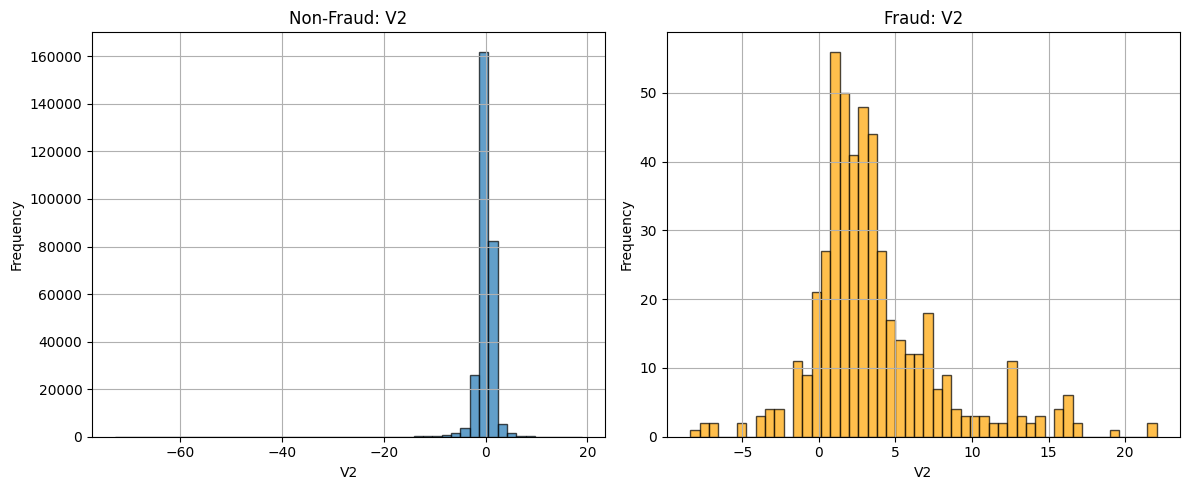

In [ ]:
# Features to plot
pos_features = ['V11', 'V4', 'V2']

# Plot each feature's distribution separately for fraud and non-fraud
for feature in pos_features:
    plt.figure(figsize=(12, 5))

    # Non-Fraud
    plt.subplot(1, 2, 1)
    df[df['Class'] == 0][feature].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Non-Fraud: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Fraud
    plt.subplot(1, 2, 2)
    df[df['Class'] == 1][feature].hist(bins=50, edgecolor='black', alpha=0.7, color='orange')
    plt.title(f'Fraud: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

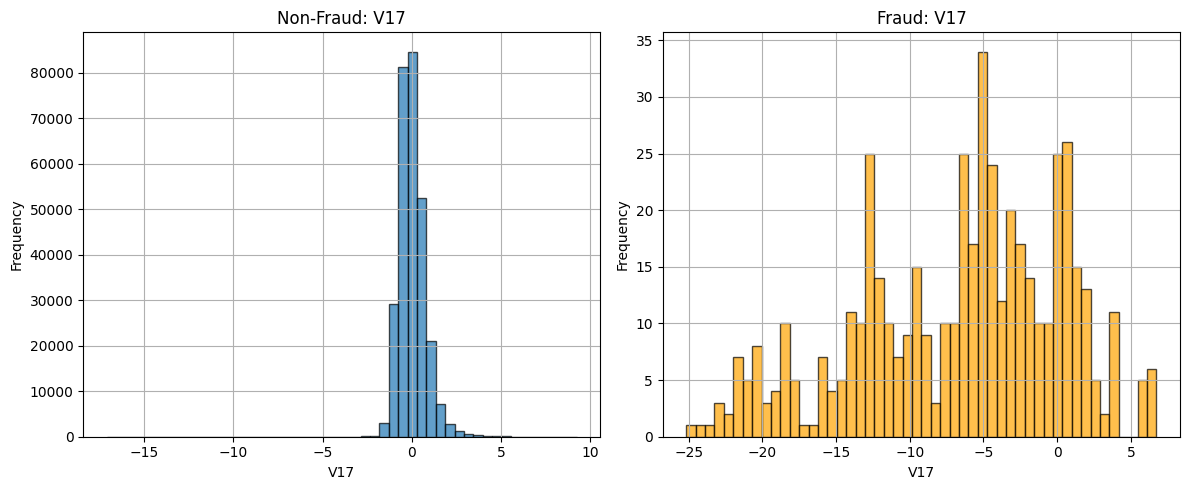

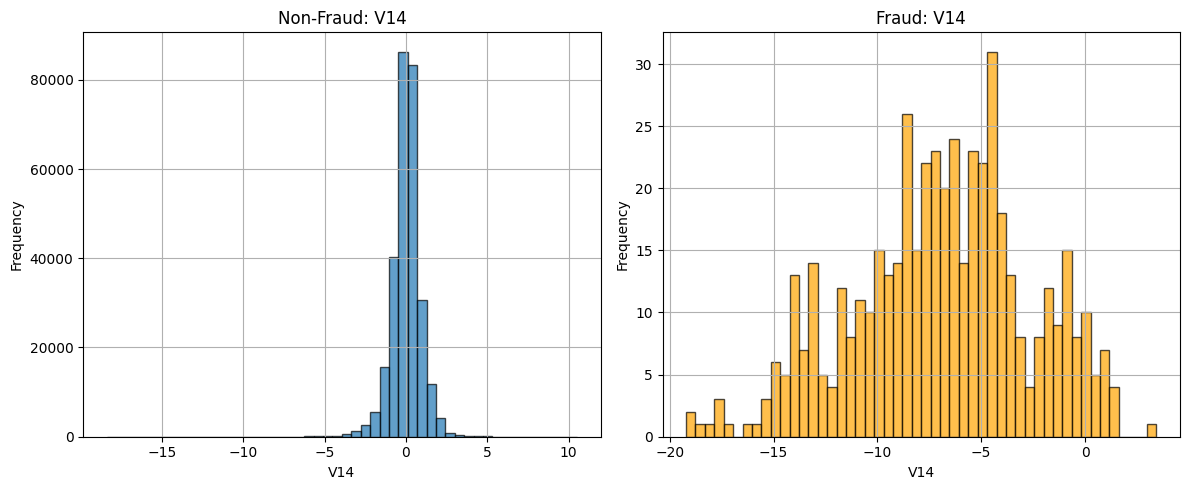

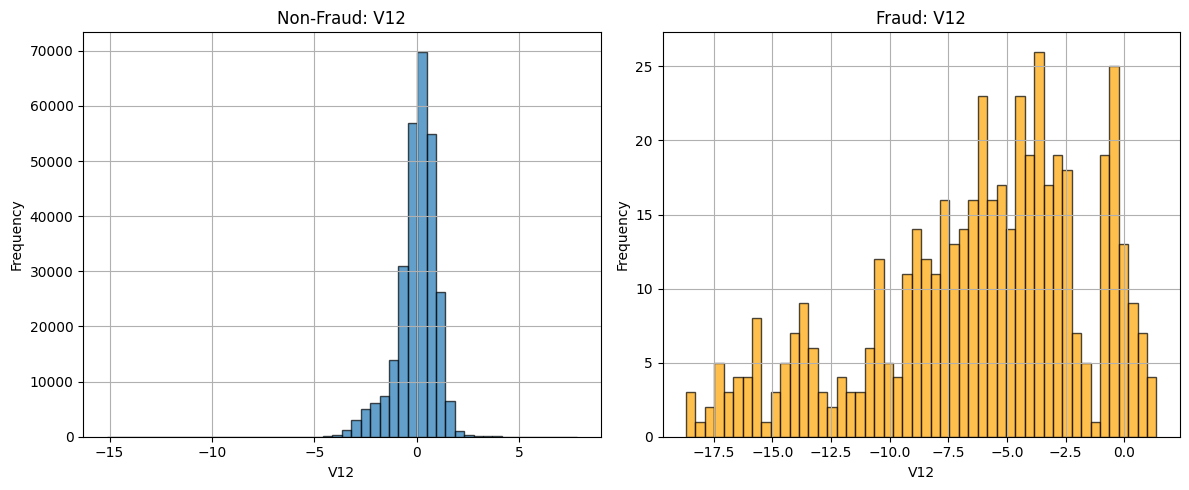

In [ ]:
# Features to plot
neg_features = ['V17', 'V14', 'V12']

# Plot each feature's distribution separately for fraud and non-fraud
for feature in neg_features:
    plt.figure(figsize=(12, 5))

    # Non-Fraud
    plt.subplot(1, 2, 1)
    df[df['Class'] == 0][feature].hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Non-Fraud: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Fraud
    plt.subplot(1, 2, 2)
    df[df['Class'] == 1][feature].hist(bins=50, edgecolor='black', alpha=0.7, color='orange')
    plt.title(f'Fraud: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [ ]:
# Convert Time to hours since the start of the dataset
df['Hour'] = df['Time'] // 3600 % 24

# Drop the original Time column if not needed
df = df.drop('Time', axis=1)

# Verify the new column
print(df[['Hour', 'Class']].head())


   Hour  Class
0   0.0      0
1   0.0      0
2   0.0      0
3   0.0      0
4   0.0      0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the 'Amount' feature
scaler = MinMaxScaler()
df['Scaled_Amount'] = scaler.fit_transform(df[['Amount']])

# Drop the original Amount column if not needed
df = df.drop('Amount', axis=1)

# Verify the new column
print(df[['Scaled_Amount', 'Class']].head())


   Scaled_Amount  Class
0       0.005824      0
1       0.000105      0
2       0.014739      0
3       0.004807      0
4       0.002724      0


In [ ]:
# Check the dataset shape and ensure there are no missing values
print(f"Dataset shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")


Dataset shape: (284807, 31)
Missing values:
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
Hour             0
Scaled_Amount    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Verify the splits
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")
print(f"Fraud in training set: {y_train.mean():.4f}")


Training set: (199364, 30), Validation set: (42721, 30), Test set: (42722, 30)
Fraud in training set: 0.0017


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score

# Initialize Logistic Regression with balanced class weights
baseline_model = LogisticRegression(class_weight="balanced", random_state=42)

# Train the model
baseline_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred = baseline_model.predict(X_val)
y_val_probs = baseline_model.predict_proba(X_val)[:, 1]  # Probability scores for fraud class

# Evaluate the model
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Calculate AUC-ROC and AUC-PR
roc_auc = roc_auc_score(y_val, y_val_probs)
print(f"Validation AUC-ROC: {roc_auc:.4f}")


Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.06      0.86      0.12        74

    accuracy                           0.98     42721
   macro avg       0.53      0.92      0.55     42721
weighted avg       1.00      0.98      0.99     42721

Validation AUC-ROC: 0.9699


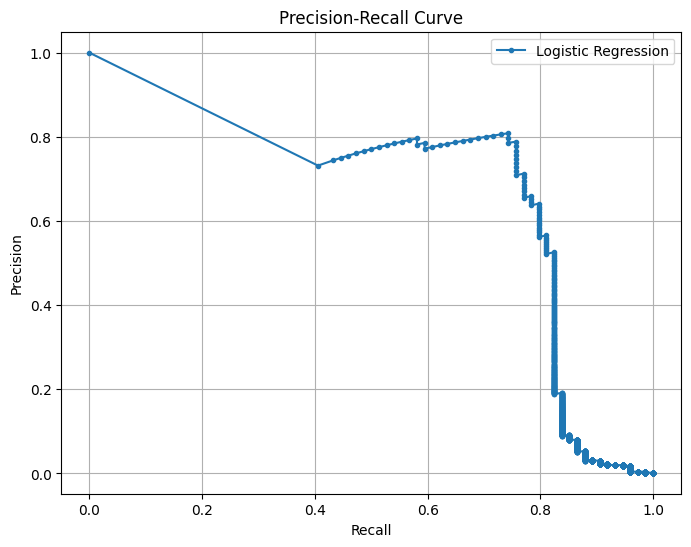

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_val, y_val_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Calculate scale_pos_weight
non_fraud = y_train.value_counts()[0]
fraud = y_train.value_counts()[1]
scale_pos_weight = non_fraud / fraud
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',  # Suppress warning for eval_metric
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred = xgb_model.predict(X_val)
y_val_probs = xgb_model.predict_proba(X_val)[:, 1]  # Probability scores for fraud class

# Evaluate the model
print("XGBoost - Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_val, y_val_probs)
print(f"Validation AUC-ROC: {roc_auc:.4f}")


scale_pos_weight: 578.55


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:36:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.90      0.76      0.82        74

    accuracy                           1.00     42721
   macro avg       0.95      0.88      0.91     42721
weighted avg       1.00      1.00      1.00     42721

Validation AUC-ROC: 0.9700


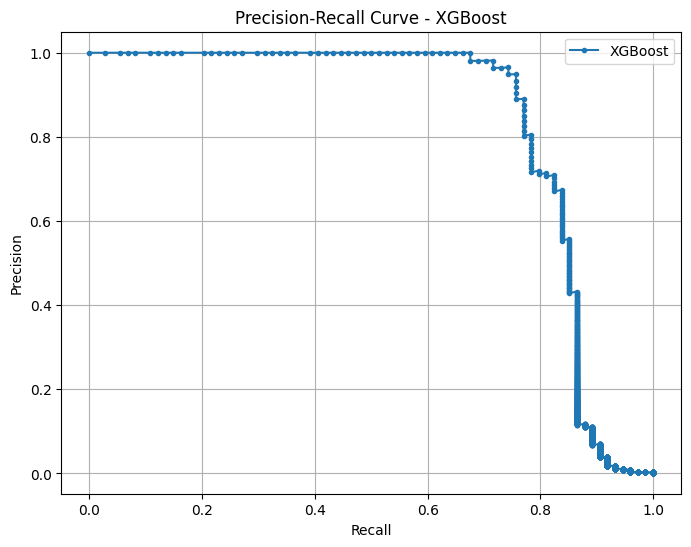

In [ ]:
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_val, y_val_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.title('Precision-Recall Curve - XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


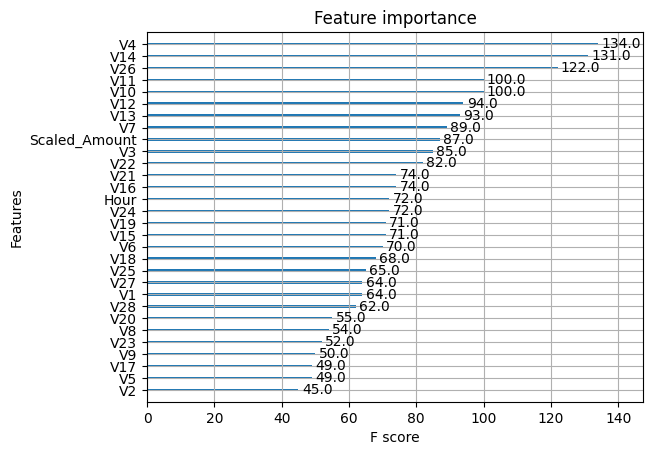

In [ ]:
xgb.plot_importance(xgb_model, importance_type='weight')
plt.show()


<Figure size 1200x800 with 0 Axes>

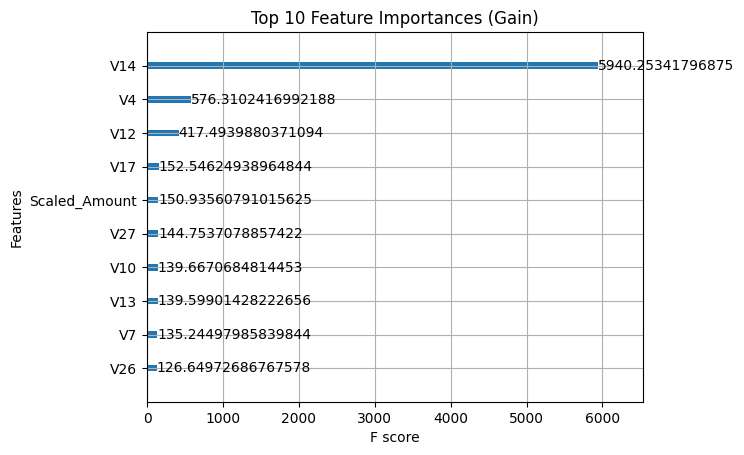

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance by gain
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10)  # Top 10 features
plt.title('Top 10 Feature Importances (Gain)')
plt.show()


In [ ]:
# Get feature importance values
feature_importance = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame for better readability
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': feature_importance.keys(),
    'Importance (Gain)': feature_importance.values()
}).sort_values(by='Importance (Gain)', ascending=False)

# Display top features
print(importance_df.head(10))


          Feature  Importance (Gain)
13            V14        5940.253418
3              V4         576.310242
11            V12         417.493988
16            V17         152.546249
29  Scaled_Amount         150.935608
26            V27         144.753708
9             V10         139.667068
12            V13         139.599014
6              V7         135.244980
25            V26         126.649727


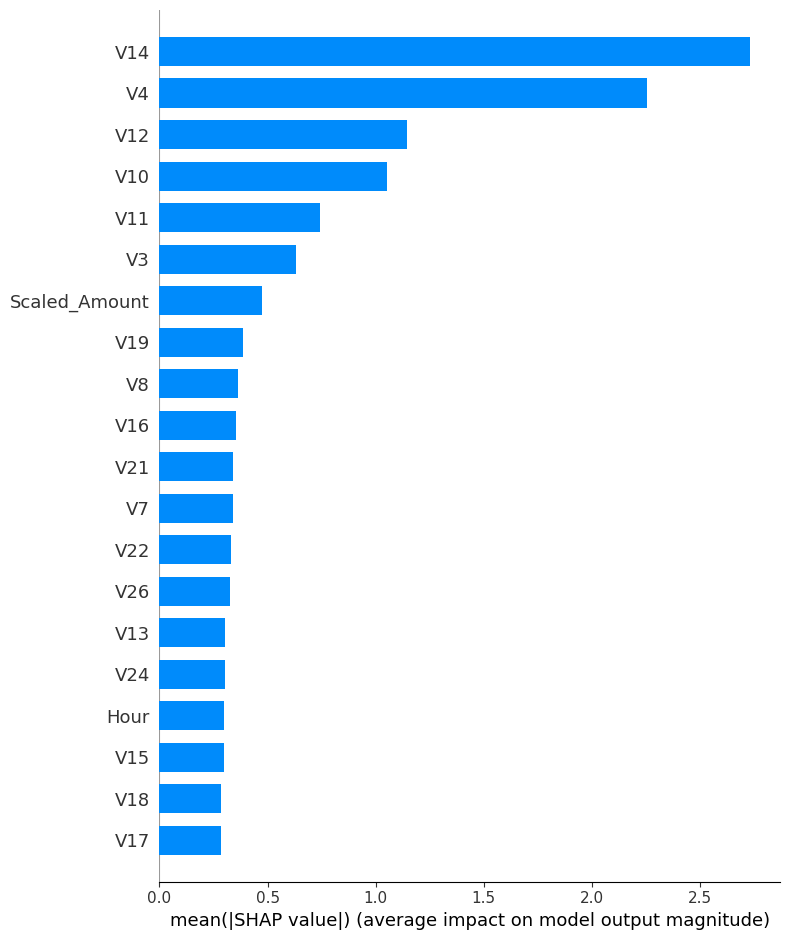

In [ ]:
!pip install shap

import shap

# Initialize SHAP visualizations
shap.initjs()

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Get SHAP values for the validation set
shap_values = explainer.shap_values(X_val)

# Summary plot: visualize feature importance across all predictions
shap.summary_plot(shap_values, X_val, plot_type="bar")


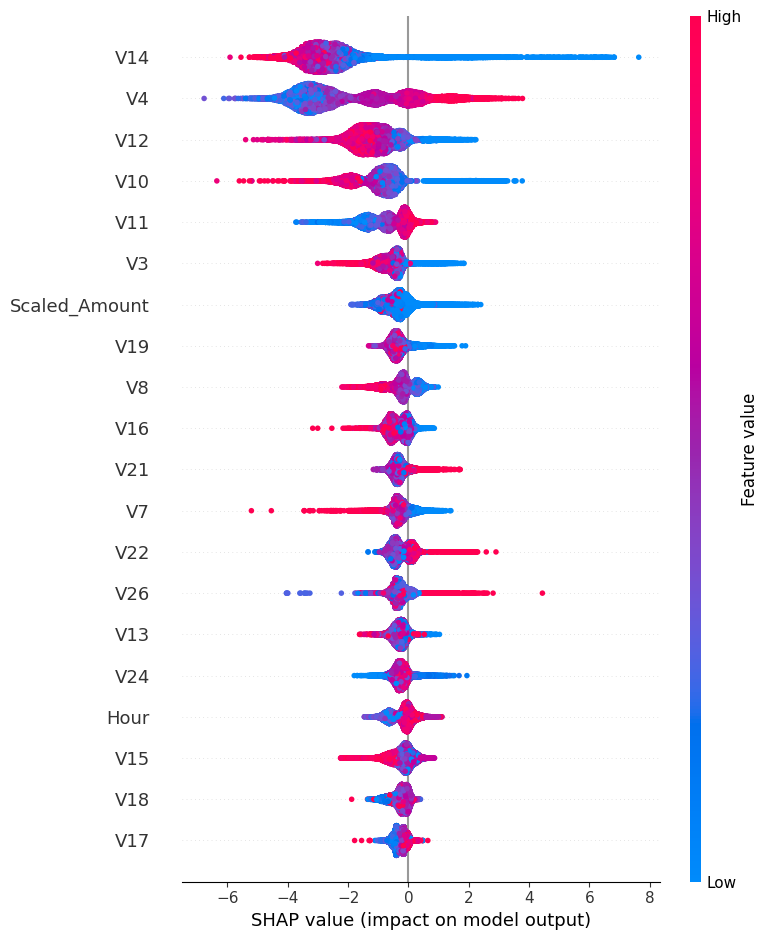

In [ ]:
# Select an example transaction
#example_index = y_val[y_val == 1].index[0]  # Example fraud case
#shap.force_plot(explainer.expected_value, shap_values[example_index], X_val.iloc[example_index])


# Use Matplotlib-based SHAP summary plot
shap.summary_plot(shap_values, X_val)


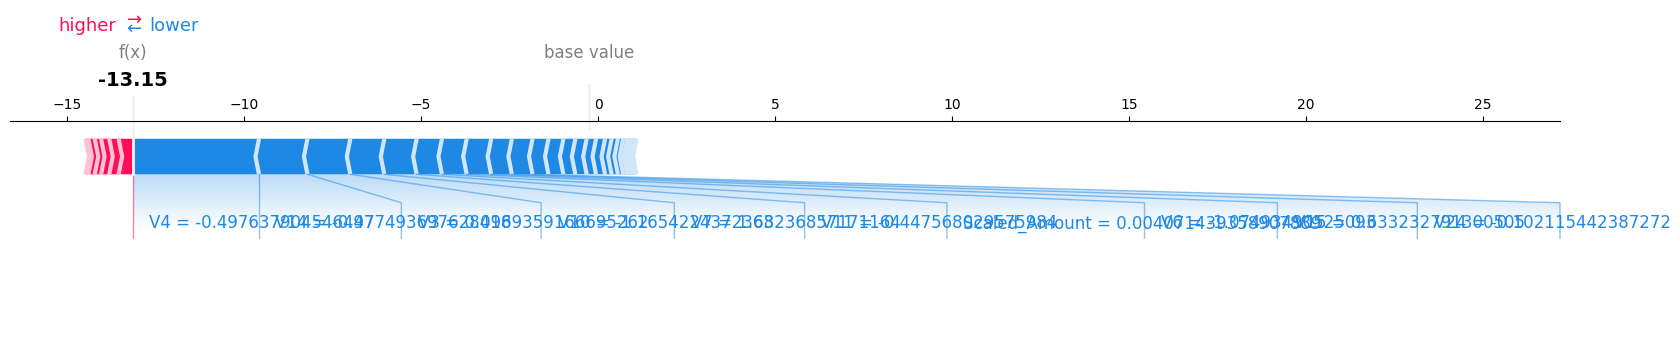

In [ ]:
# Save force plot as an HTML file
shap.force_plot(explainer.expected_value, shap_values[example_index], X_val.iloc[example_index], matplotlib=True)


In [ ]:
# Save force plot as an HTML file
import shap

# Create the force plot
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[example_index],
    X_val.iloc[example_index]
)

# Save the force plot as HTML
shap.save_html("force_plot.html", force_plot)

print("Force plot saved as 'force_plot.html'. You can download and view it.")


Force plot saved as 'force_plot.html'. You can download and view it.


In [ ]:
from google.colab import files
files.download("force_plot.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>